# Author: Shantanu Tyagi
# Date: 09-02-2021
# ID: 201801015

# Question 1
### The file did not completely load in MS Excel and it prompted the same. This is because Exccel has a row limit of 1048576 rows. Our CSV file seems to have more number of rowas than this so now we try to load the data in python and check the number of rows it has since Excel failed to handle our Big Data.

# Question 2
### Here, I have used pandas dataframe to load the data

In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import seaborn as sns 

# Column Name
name1 = "AirTime"
name2 = "Distance"

# Reading CSV
df = pd.read_csv('2008.csv', usecols=[name1, name2])
df = df.dropna(subset=[name1, name2]) 

In [96]:
df.shape

(6855029, 2)

### As we can clearly see above, the actual row count is 6855029

# Question 3
### Data cleaning technique used is the Inter Quartile Range in which we first find out the range between 25% and 75% of sorted data and then we multiply it with 1.5. Next we discard the data lying before 25% - 1.5*IQR and also above 75% + 1.5*IQR. These are the  outliers. Then normalize to zero mean one standard deviation by simply subtracting the mean and dividing by standard deviation. 
### The first and the third quartiles, Q1 and Q3, lies at -0.675σ and +0.675σ from the mean, respectively.
### Lower Bound:
### = Q1 - 1.5 * IQR
### = Q1 - 1.5 * (Q3 - Q1)
### = -0.675σ - 1.5 * (0.675 - [-0.675])σ
### = -0.675σ - 1.5 * 1.35σ
### = -2.7σ
### Upper Bound:
### = Q3 + 1.5 * IQR
### = Q3 + 1.5 * (Q3 - Q1)
### = 0.675σ + 1.5 * (0.675 - [-0.675])σ
### = 0.675σ + 1.5 * 1.35σ
### = 2.7σ

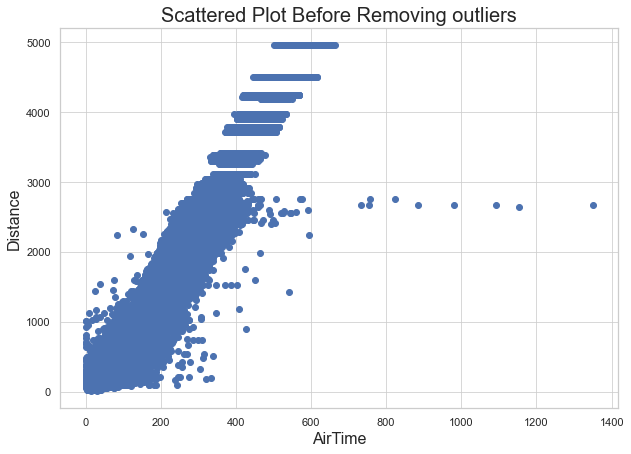

COLUMN: AirTime
Mean: 104.0185891263188
STD: 67.43979594730732

COLUMN: Distance
Mean: 728.7438337605865
STD: 563.2447305232743


In [97]:
plt.figure(figsize=(10, 7))
plt.scatter(df[name1], df[name2])
plt.title('Scattered Plot Before Removing outliers', fontsize=20)
plt.xlabel(name1, fontsize=16)
plt.ylabel(name2, fontsize=16)
plt.grid(alpha=0.75)
plt.show()
print('COLUMN: ' + name1)
print('Mean: '+str(df[name1].mean()))
print('STD: '+str(df[name1].std()))
print()
print('COLUMN: ' + name2)
print('Mean: '+str(df[name2].mean()))
print('STD: '+str(df[name2].std()))

COLUMN: AirTime
25%ile: 55.0
75%ile: 132.0
IQR: 77.0
25%ile - 1.5*IQR: -60.5
75%ile + 1.5*IQR: 247.5

COLUMN: Distance
25%ile: 326.0
75%ile: 954.0
IQR: 628.0
25%ile - 1.5*IQR: -616.0
75%ile + 1.5*IQR: 1896.0


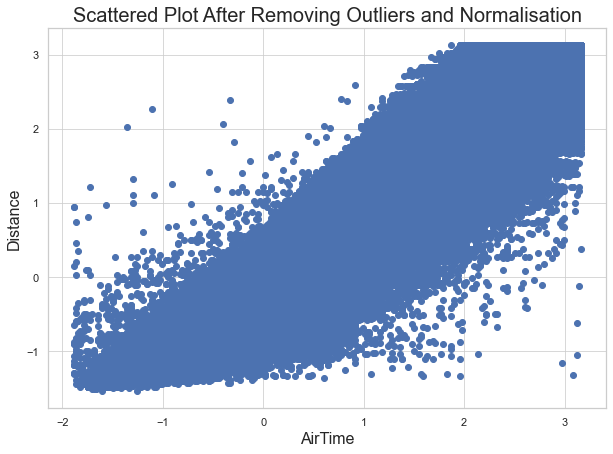

COLUMN: AirTime
Mean: 5.930531189518252e-17
STD: 1.0000000000000002

COLUMN: Distance
Mean: 1.1432795193582436e-16
STD: 1.0000000000000002


In [98]:
# Dataframes
df1 = df[name1]
df2 = df[name2]

# Removing outliers based on IQR
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1 #stats.iqr(df1, interpolation = 'midpoint')
low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr
df = df[df[name1] <= up_lim]
df = df[df[name1] >= low_lim]
print('COLUMN: ' + name1)
print('25%ile: ' + str(q1))
print('75%ile: ' + str(q3))
print('IQR: ' + str(iqr))
print('25%ile - 1.5*IQR: ' + str(low_lim))
print('75%ile + 1.5*IQR: ' + str(up_lim))
print()

q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)
iqr = q3 - q1 #stats.iqr(df1, interpolation = 'midpoint')
low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr
df = df[df[name2] <= up_lim]
df = df[df[name2] >= low_lim]
print('COLUMN: ' + name2)
print('25%ile: ' + str(q1))
print('75%ile: ' + str(q3))
print('IQR: ' + str(iqr))
print('25%ile - 1.5*IQR: ' + str(low_lim))
print('75%ile + 1.5*IQR: ' + str(up_lim))

# New dataframes for individual analysis
df1 = df[name1]
df2 = df[name2]

# Normalise to STD Normal such that MEAN = 0, VAR(SD) = 1
df1 = ( df1 - df1.mean() ) / df1.std()
df2 = ( df2 - df2.mean() ) / df2.std()

plt.figure(figsize=(10, 7))
plt.scatter(df1, df2)
plt.title('Scattered Plot After Removing Outliers and Normalisation', fontsize=20)
plt.xlabel(name1, fontsize=16)
plt.ylabel(name2, fontsize=16)
plt.grid(alpha=0.75)
plt.show()

print('COLUMN: ' + name1)
print('Mean: '+str(df1.mean()))
print('STD: '+str(df1.std()))
print()
print('COLUMN: ' + name2)
print('Mean: '+str(df2.mean()))
print('STD: '+str(df2.std()))

<AxesSubplot:xlabel='AirTime'>

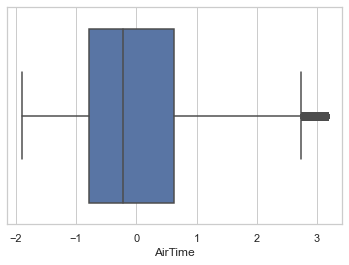

In [99]:
sns.set_theme(style="whitegrid")  
sns.boxplot(x=df1)

<AxesSubplot:xlabel='Distance'>

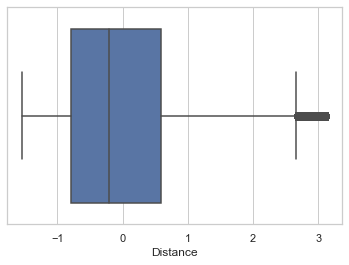

In [100]:
sns.set_theme(style="whitegrid")  
sns.boxplot(x=df2)

### PDF and CDF distribution is plotted of the normalized data with two different bin sizes.

In [101]:
# Histogram function (data array, number of bins, subplot number, normalised?, cumulative?)
def plotHistogram(data, bins, i, norm, cumu):
    # Sub plot
    ii = i
    plt.subplot(1, 2, i)
    # assign weights if normalisation has to take place
    if norm:
        size = len(data)
    else: # else weights = 1
        size = 1
    # Hist function gives heights, bin intervals and patches with weight array to normalise heights
    n, bins, patches = plt.hist(data, bins=bins, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.8, cumulative=cumu, weights = np.ones_like(data)*1./size)
    nn = max(n)
    # patches are used to change color of the bars in histogram
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis((n[i]/nn)))  
    # plotting starts here
    if type(ran_norm1) != np.ndarray:
        if cumu == False:
            plt.title(data.name + ' Data PDF Histogram, bins: '+str(i+1), fontsize=20)
        else:
            plt.title(data.name + ' Data CDF Histogram, bins: '+str(i+1), fontsize=20)
    else:
        if cumu == False:
            plt.title('Random Normal Distribution ' + str(ii) +"'s PDF Histogram, bins: "+str(i+1), fontsize=20)
        else:
            plt.title('Random Normal Distribution ' + str(ii) +"'s CDF Histogram, bins: "+str(i+1), fontsize=20)
        
    plt.xlabel('Normalised Value', fontsize=16)
    if norm:
        plt.ylabel('Normalised Frequency', fontsize=16)
    else:
        plt.ylabel('Frequency', fontsize=16)
    plt.grid(axis='y', alpha=0.75)
    
    return n


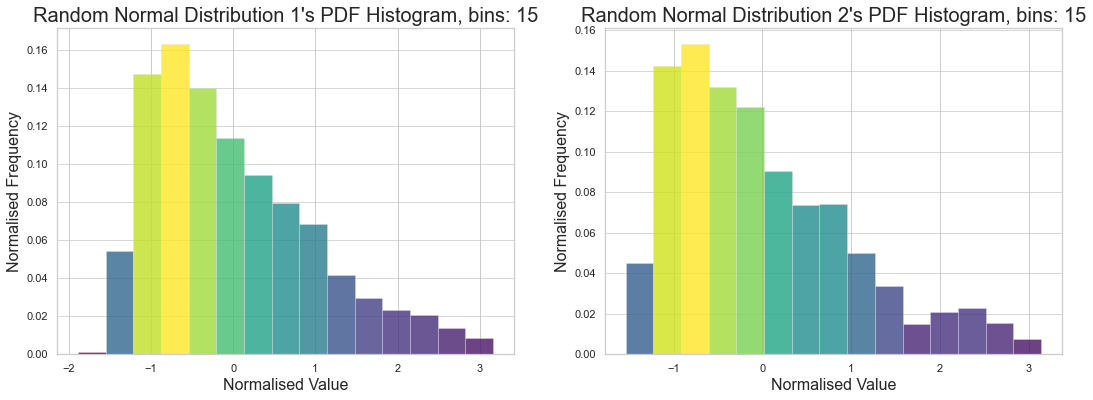

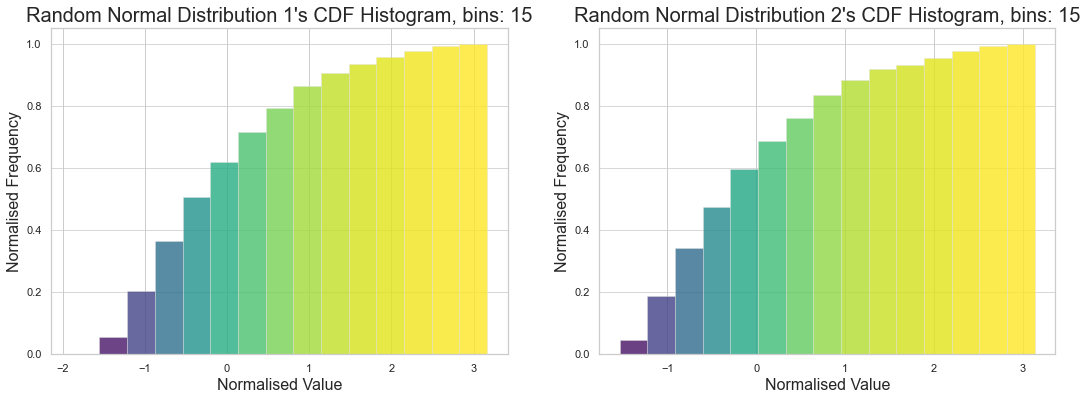

In [102]:
# plot PDF  by calling the function
plt.figure(figsize=(18, 6))
# TMAX histogram
plotHistogram(df1,15, 1, True, False) # 15 bins
#plotHistogram(df1,10, 2, True, False) # 10 bins
#plt.show()
#plt.figure(figsize=(18, 6))
# TMIN histogram 
plotHistogram(df2,15, 2, True, False) # 15 bins
#plotHistogram(df2,10, 2, True, False) # 10 bins
plt.show()

# plot Cumulative PDF  by calling the function
plt.figure(figsize=(18, 6))
# TMAX histogram
arr1 = plotHistogram(df1,15, 1, True, True) # 15 bins
#plotHistogram(df1,10, 2, True, True) # 10 bins
#plt.show()
#plt.figure(figsize=(18, 6))
# TMIN histogram 
arr2 = plotHistogram(df2,15, 2, True, True) # 15 bins
#plotHistogram(df2,10, 2, True, True) # 10 bins
plt.show()

# Question 4
### Using random number generator to get samples from Normal distribution N(0,1) approximately same number of samples as our data
### About 68.26% of the whole data lies within one standard deviation (<σ) of the mean (μ), taking both sides into account, the pink region in the figure.
### About 95.44% of the whole data lies within two standard deviations (2σ) of the mean (μ), taking both sides into account, the pink+blue region in the figure.
### About 99.72% of the whole data lies within three standard deviations (<3σ) of the mean (μ), taking both sides into account, the pink+blue+green region in the figure.
### And the rest 0.28% of the whole data lies outside three standard deviations (>3σ) of the mean (μ), taking both sides into account, the little red region in the figure. And this part of the data is considered as outliers.

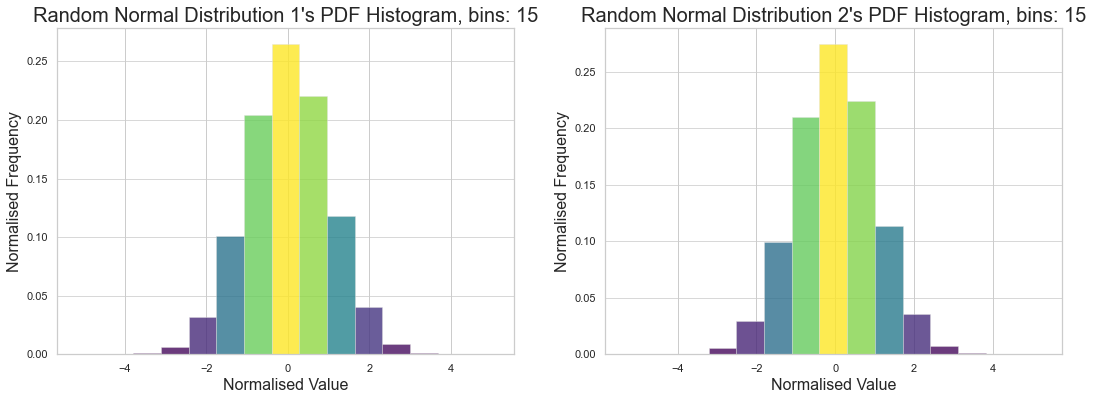

Mean: 0.0008144904373446134
STD: 0.9999815199642516



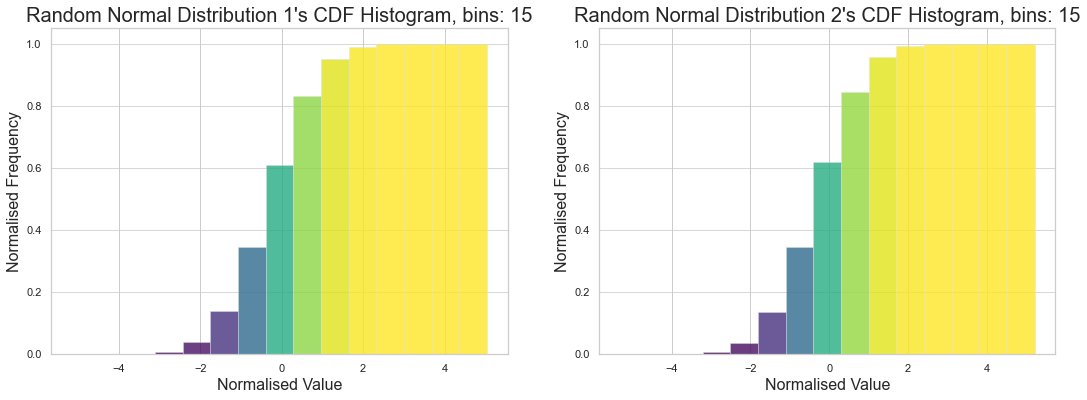

Mean: -7.814227755193747e-05
STD: 0.9997754253271889



In [103]:
# two random normal distributions
ran_norm1 = np.random.normal(loc=0, scale=1, size=df1.size)
ran_norm2 = np.random.normal(loc=0, scale=1, size=df2.size)
# plot PDF  by calling the function
plt.figure(figsize=(18, 6))
# TMAX histogram
plotHistogram(ran_norm1,15, 1, True, False) # 15 bins
#plotHistogram(ran_norm1,10, 2, True, False) # 10 bins
#plt.show()
#plt.figure(figsize=(18, 6))
# TMIN histogram 
plotHistogram(ran_norm2,15, 2, True, False) # 15 bins
#plotHistogram(ran_norm2,10, 2, True, False) # 10 bins
plt.show()
print('Mean: '+str(ran_norm1.mean()))
print('STD: '+str(ran_norm1.std()))
print()

# plot Cumulative PDF  by calling the function
plt.figure(figsize=(18, 6))
# TMAX histogram
arr3 = plotHistogram(ran_norm1,15, 1, True, True) # 15 bins
#plotHistogram(ran_norm1,10, 2, True, True) # 10 bins
#plt.show()
#plt.figure(figsize=(18, 6))
# TMIN histogram 
arr4 = plotHistogram(ran_norm2,15, 2, True, True) # 15 bins
#plotHistogram(ran_norm2,10, 2, True, True) # 10 bins
plt.show()
print('Mean: '+str(ran_norm2.mean()))
print('STD: '+str(ran_norm2.std()))
print()

# Question 5
### Performing KS Test to check how close our data is to normal distribution

In [104]:
a1,p1 = ks_2samp(arr1, arr3)
a2,p2 = ks_2samp(arr2, arr4)

In [105]:
print(name1+' Statistic: '+str(a1)+", P-value: "+str(p1))
print(name2+' Statistic: '+str(a2)+", P-value: "+str(p2))

AirTime Statistic: 0.26666666666666666, P-value: 0.6781382270680966
Distance Statistic: 0.3333333333333333, P-value: 0.3855465198257425


#### For a different distribution, we can reject the null hypothesis since the pvalue is below 1%:
#### For a slightly different distribution, we cannot reject the null hypothesis at a 10% or lower alpha
#### or an identical distribution, we cannot reject the null hypothesis since the p-value is high.

# Question 6

In [106]:
def KST(arr1,arr3):
    D = 0
    ind = 0
    for i in range(0,len(arr1)):
        D = max(abs(arr1[i]-arr3[i]),D)
    print('Statistic Value: '+ str(D))
    print()
    data = []

    for i in range(1,100,5):
        rhs = np.sqrt(-0.5*np.log(i/100))*np.sqrt((len(arr1)+len(arr3))/(len(arr1)*len(arr3))) 
        temp = []
        if (rhs>=D):
            temp = [i/100,rhs,True]
        else:
            temp = [i/100,rhs,False]
        data.append(temp)
    kstest = pd.DataFrame(data, columns=['Alpha','RHS','Result'])
    print(kstest)

print(name1)
KST(arr1,arr3)
print()
print(name2)
KST(arr2,arr4)


AirTime
Statistic Value: 0.47949167080451877

    Alpha       RHS  Result
0    0.01  0.554086    True
1    0.06  0.433083   False
2    0.11  0.383604   False
3    0.16  0.349531   False
4    0.21  0.322557   False
5    0.26  0.299675   False
6    0.31  0.279426   False
7    0.36  0.260979   False
8    0.41  0.243803   False
9    0.46  0.227527   False
10   0.51  0.211872   False
11   0.56  0.196608   False
12   0.61  0.181530   False
13   0.66  0.166436   False
14   0.71  0.151105   False
15   0.76  0.135262   False
16   0.81  0.118525   False
17   0.86  0.100274   False
18   0.91  0.079293   False
19   0.96  0.052168   False

Distance
Statistic Value: 0.5600116453868201

    Alpha       RHS  Result
0    0.01  0.554086   False
1    0.06  0.433083   False
2    0.11  0.383604   False
3    0.16  0.349531   False
4    0.21  0.322557   False
5    0.26  0.299675   False
6    0.31  0.279426   False
7    0.36  0.260979   False
8    0.41  0.243803   False
9    0.46  0.227527   False
10   0.51  